In [6]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import numpy as np

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf #to bind plotly and pandas together
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Binding Plotly and Pandas bcoz Plotly has its own dashboard online & we need it offline.
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
# converting scientific (e+8 or smething) notation to float 
pd.options.display.float_format = '{:.2f}'.format

# Importing Dataset
### Link:  https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv

In [9]:
df = pd.read_csv("covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [10]:
df.shape

(172480, 8)

In [11]:
#Rename columns
df.rename(columns={'Country/Region' : 'Country'}, inplace=True)
df.rename(columns={'ObservationDate' : 'Date'}, inplace=True)
df.rename(columns={'Province/State' : 'State'}, inplace=True)
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [12]:
df.tail()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.00,337.00,6556.00
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.00,104.00,0.00
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.00,1.00,1288.00
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.00,531.00,22263.00
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.00,2414.00,0.00


# Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          172480 non-null  int64  
 1   Date         172480 non-null  object 
 2   State        124597 non-null  object 
 3   Country      172480 non-null  object 
 4   Last Update  172480 non-null  object 
 5   Confirmed    172480 non-null  float64
 6   Deaths       172480 non-null  float64
 7   Recovered    172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [14]:
# Finding null values
df.isnull().sum()

SNo                0
Date               0
State          47883
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [15]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.00,172480.00,172480.00,172480.00
mean,86240.50,33231.56,1050.03,21028.25
std,49790.83,103134.89,3499.44,115659.79
min,1.00,-302844.00,-178.00,-854405.00
25%,43120.75,457.00,6.00,10.00
50%,86240.50,4016.50,76.00,858.00
75%,129360.25,18843.00,554.00,7229.00
max,172480.00,2290891.00,54804.00,5624444.00


In [16]:
# to get confirmed cases on each date
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,01/22/2020,555.00
1,01/23/2020,653.00
2,01/24/2020,941.00
3,01/25/2020,1438.00
4,01/26/2020,2118.00
...,...,...
315,12/02/2020,64530517.00
316,12/03/2020,65221040.00
317,12/04/2020,65899441.00
318,12/05/2020,66540034.00


In [17]:
# to get Deaths cases on each date
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths

,Date,Deaths
0,01/22/2020,17.00
1,01/23/2020,18.00
2,01/24/2020,26.00
3,01/25/2020,42.00
4,01/26/2020,56.00
...,...,...
315,12/02/2020,1493742.00
316,12/03/2020,1506260.00
317,12/04/2020,1518670.00
318,12/05/2020,1528868.00


In [18]:
# to get Recovered cases on each date
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered

,Date,Recovered
0,01/22/2020,28.00
1,01/23/2020,30.00
2,01/24/2020,36.00
3,01/25/2020,39.00
4,01/26/2020,52.00
...,...,...
315,12/02/2020,41496318.00
316,12/03/2020,41932091.00
317,12/04/2020,42352021.00
318,12/05/2020,42789879.00


<AxesSubplot:xlabel='Date'>

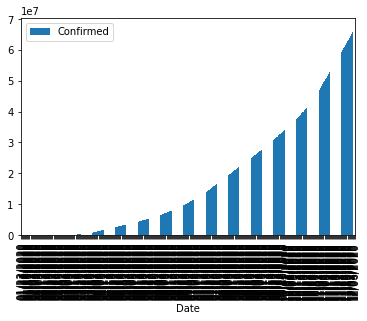

In [19]:
# Data visualization using Pandas
confirmed.plot(kind='bar',x='Date', y='Confirmed')

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

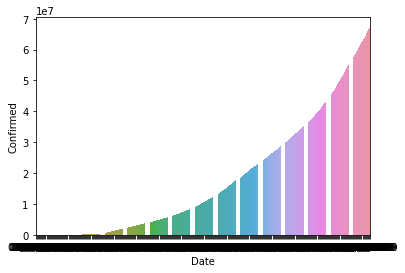

In [20]:
# Data visualization using Seaborn
sns.barplot(x=confirmed['Date'], y=confirmed['Confirmed'])

<BarContainer object of 320 artists>

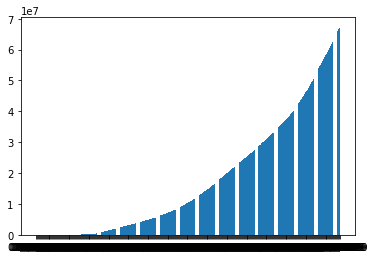

In [21]:
# Data visualization using Matplotlib

plt.bar(x=confirmed['Date'], height=confirmed['Confirmed'])

In [22]:
# Data visualization using Plotly

confirmed.iplot(kind='bar', x='Date', y='Confirmed')

In [23]:
deaths.iplot(kind='bar', x='Date', y='Deaths')

In [24]:
recovered.iplot(kind='bar', x='Date', y='Recovered')

# Prediction

In [25]:
#Using FBProphet

from fbprophet import Prophet

In [27]:
#Predicting Confirmed cases against Date using fbprophet
# https://facebook.github.io/prophet/docs/quick_start.html#python-api

#Renaming columns to ds and y (as required by fbprophet)

confirmed.columns=['ds','y']


#Changing datestamp format to YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed

,ds,y
0,2020-01-22,555.00
1,2020-01-23,653.00
2,2020-01-24,941.00
3,2020-01-25,1438.00
4,2020-01-26,2118.00
...,...,...
315,2020-12-02,64530517.00
316,2020-12-03,65221040.00
317,2020-12-04,65899441.00
318,2020-12-05,66540034.00


In [28]:
# instantiating a new Prophet object
# and training the model

model = Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
#Creating future dataframe periods=30 means next 30 days
# change period for more future predictions
future=model.make_future_dataframe(periods=120)
future.tail(35)

,ds
405,2021-03-02
406,2021-03-03
407,2021-03-04
408,2021-03-05
409,2021-03-06
410,2021-03-07
411,2021-03-08
412,2021-03-09
413,2021-03-10
414,2021-03-11


In [36]:
forcast_confirmed=model.predict(future)

In [37]:
forcast_confirmed

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-46471.05,-968216.21,834881.15,-46471.05,-46471.05,-18306.81,-18306.81,-18306.81,-18306.81,-18306.81,-18306.81,0.00,0.00,0.00,-64777.86
1,2020-01-23,-42557.91,-967520.78,901218.51,-42557.91,-42557.91,5076.57,5076.57,5076.57,5076.57,5076.57,5076.57,0.00,0.00,0.00,-37481.33
2,2020-01-24,-38644.76,-908438.85,933455.89,-38644.76,-38644.76,36906.10,36906.10,36906.10,36906.10,36906.10,36906.10,0.00,0.00,0.00,-1738.66
3,2020-01-25,-34731.62,-929786.55,1023540.40,-34731.62,-34731.62,41658.99,41658.99,41658.99,41658.99,41658.99,41658.99,0.00,0.00,0.00,6927.37
4,2020-01-26,-30818.47,-995187.11,873790.90,-30818.47,-30818.47,15787.28,15787.28,15787.28,15787.28,15787.28,15787.28,0.00,0.00,0.00,-15031.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-04-01,123208202.55,109401228.80,135802460.23,109633608.65,136382937.77,5076.57,5076.57,5076.57,5076.57,5076.57,5076.57,0.00,0.00,0.00,123213279.12
436,2021-04-02,123706983.44,110012199.14,136569544.87,109942580.84,136956955.26,36906.10,36906.10,36906.10,36906.10,36906.10,36906.10,0.00,0.00,0.00,123743889.54
437,2021-04-03,124205764.34,109779740.58,137640120.72,110251553.03,137530972.76,41658.99,41658.99,41658.99,41658.99,41658.99,41658.99,0.00,0.00,0.00,124247423.33
438,2021-04-04,124704545.24,110332695.12,138116183.41,110578535.76,138104990.25,15787.28,15787.28,15787.28,15787.28,15787.28,15787.28,0.00,0.00,0.00,124720332.51


In [38]:
#we need only 4 columns ds, yhat(prediction), yhat_lower(lower range), yhat_upper(upper_range)

forcast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
410,2021-03-07,110754467.38,100769364.97,120034807.17
411,2021-03-08,111197368.74,101176959.53,120681105.80
412,2021-03-09,111695212.03,101821906.37,121138445.72
413,2021-03-10,112216715.99,101595613.03,121562320.34
414,2021-03-11,112738880.27,102370839.90,122272443.79
415,2021-03-12,113269490.69,102691377.05,123196174.30
416,2021-03-13,113773024.48,102983414.64,123635350.55
417,2021-03-14,114245933.67,103323389.97,124268339.44
418,2021-03-15,114688835.02,103813920.38,125155205.47
419,2021-03-16,115186678.32,103817410.60,125810285.82


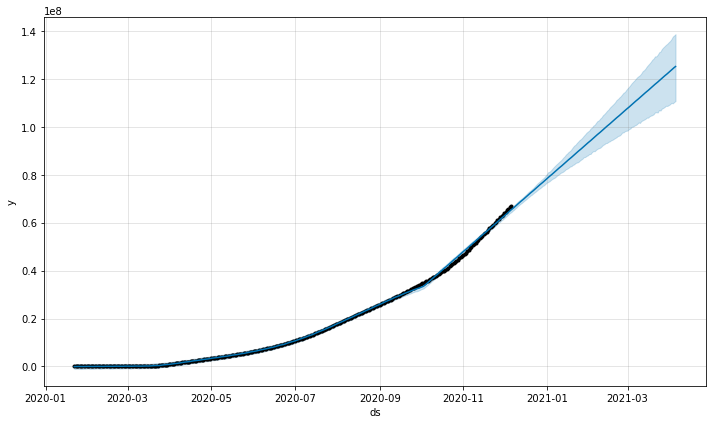

In [39]:
confirmed_forcast_plot = model.plot(forcast_confirmed)

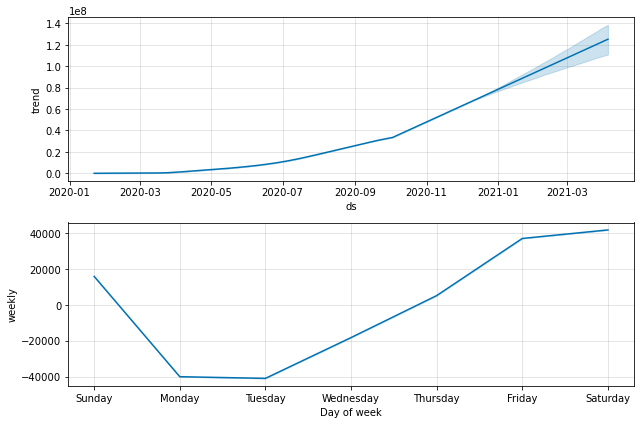

In [41]:
confirmed_forcast_plot_components=model.plot_components(forcast_confirmed)

# Deaths Prediction

In [42]:
# Deaths Prediction
deaths.columns=['ds','y']

#Changing datestamp format to YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS
deaths['ds']=pd.to_datetime(deaths['ds'])
deaths

,ds,y
0,2020-01-22,17.00
1,2020-01-23,18.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00
...,...,...
315,2020-12-02,1493742.00
316,2020-12-03,1506260.00
317,2020-12-04,1518670.00
318,2020-12-05,1528868.00


In [44]:
death_model = Prophet(interval_width=0.95)
death_model.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
death_forcast_confirmed=death_model.predict(future)
#death_forcast_confirmed
death_forcast_confirmed[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1328.72,-20605.72,16813.84
1,2020-01-23,-366.01,-18712.79,16116.04
2,2020-01-24,469.81,-18616.49,19350.17
3,2020-01-25,449.15,-18218.53,19288.95
4,2020-01-26,-730.13,-18944.61,17725.29
...,...,...,...,...
435,2021-04-01,2374055.60,1996693.34,2691955.07
436,2021-04-02,2382358.76,2001181.03,2708310.69
437,2021-04-03,2389805.45,2011751.99,2714827.67
438,2021-04-04,2396093.52,2009650.70,2731521.91


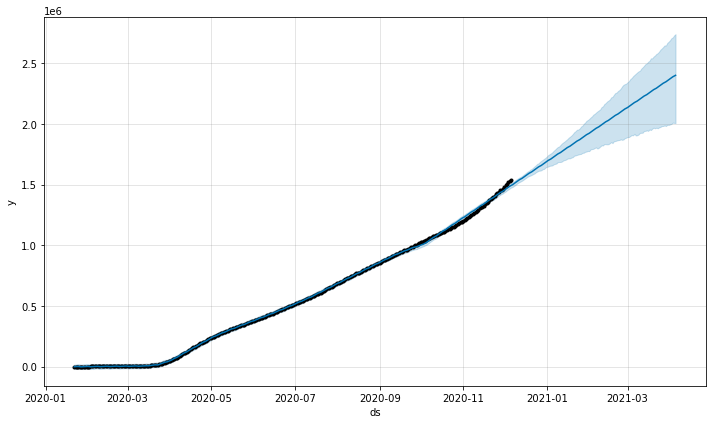

In [52]:
death_confirmed_forcast_plot = death_model.plot(death_forcast_confirmed)

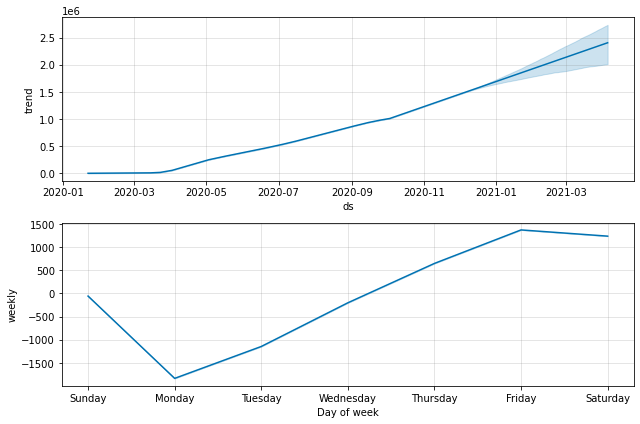

In [53]:
death_confirmed_forcast_plot_components=death_model.plot_components(death_forcast_confirmed)

# Recovered prediction

In [54]:
# Recovered Prediction
recovered.columns=['ds','y']

#Changing datestamp format to YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS
recovered['ds']=pd.to_datetime(recovered['ds'])
recovered

,ds,y
0,2020-01-22,28.00
1,2020-01-23,30.00
2,2020-01-24,36.00
3,2020-01-25,39.00
4,2020-01-26,52.00
...,...,...
315,2020-12-02,41496318.00
316,2020-12-03,41932091.00
317,2020-12-04,42352021.00
318,2020-12-05,42789879.00


In [55]:
recovered_model = Prophet(interval_width=0.95)
recovered_model.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
recovered_forcast_confirmed=recovered_model.predict(future)
#recovered_forcast_confirmed
recovered_forcast_confirmed[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-31371.04,-634984.57,594963.35
1,2020-01-23,-26810.28,-637773.32,573754.86
2,2020-01-24,-36071.28,-646311.58,600948.03
3,2020-01-25,-10283.58,-601411.13,519578.74
4,2020-01-26,-21761.15,-650812.56,591837.25
...,...,...,...,...
435,2021-04-01,73983037.97,67287650.00,81000968.30
436,2021-04-02,74251203.63,67682969.60,81390606.83
437,2021-04-03,74554417.99,67650164.98,81875089.19
438,2021-04-04,74820367.07,68007359.79,82110765.02


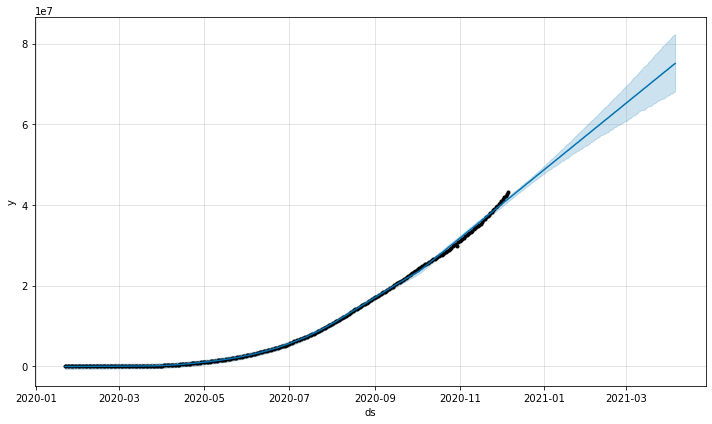

In [57]:
recovered_confirmed_forcast_plot = recovered_model.plot(recovered_forcast_confirmed)

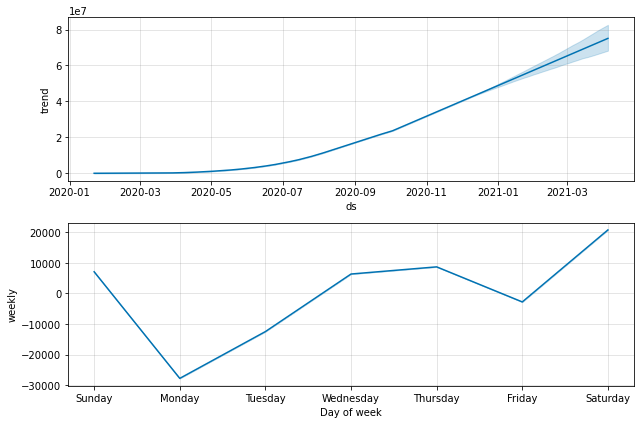

In [58]:
recovered_confirmed_forcast_plot_components=recovered_model.plot_components(recovered_forcast_confirmed)